In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torchvision import transforms as T
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
from torchvision.datasets import CIFAR10

In [5]:
train_transform = T.Compose([
    T.RandomCrop((32, 32), padding=4),
    T.RandomHorizontalFlip(0.5),
    T.ColorJitter(contrast=0.25),
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])
val_transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.243, 0.261)),
])

train_dataset = CIFAR10("./data/", download=True, train=True, transform=train_transform)
val_dataset = CIFAR10("./data/", download=True, train=False, transform=val_transform)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
train_dataloader = DataLoader(train_dataset, batch_size=100, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=100)

In [7]:
from src.utils import set_random_seed

In [8]:
from src.utils import train, predict

In [9]:
from src.layers.trl import TRL

set_random_seed(12346)
model = nn.Sequential(
    nn.Sequential(
        nn.Conv2d(3, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(64, 64, (3, 3), padding="same"),
        nn.BatchNorm2d(64),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(64, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.MaxPool2d((3, 3), stride=(2, 2), padding=(1, 1)),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        nn.Conv2d(128, 128, (3, 3), padding="same"),
        nn.BatchNorm2d(128),
        nn.ReLU(),
    ),
    nn.Sequential(
        TRL((128, 8, 8), (32, 2, 2), 10, 10),
    )
)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
criterion = nn.CrossEntropyLoss(reduction="mean")
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 30, gamma=0.1, verbose=True)
# scheduler = None
n_epochs = 100

device = "cuda:0" if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
# device = "cpu"

Adjusting learning rate of group 0 to 1.0000e-02.


In [10]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels.to("cpu"), true_labels.to("cpu"))
print("tests passed")

tests passed


In [11]:
accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler, plot=False)

  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 0, Train loss: 1.4508855273723602, Validation loss: 1.1618249416351318, Validation accuracy: 0.5867


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 1, Train loss: 0.9725552238225937, Validation loss: 0.9711634516716003, Validation accuracy: 0.6724


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 2, Train loss: 0.7824044177532196, Validation loss: 0.7977110147476196, Validation accuracy: 0.7247


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 3, Train loss: 0.6678330765962601, Validation loss: 0.9230563044548035, Validation accuracy: 0.704


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 4, Train loss: 0.5987076743245124, Validation loss: 0.6966337561607361, Validation accuracy: 0.7694


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 5, Train loss: 0.5380956460833549, Validation loss: 0.6099436283111572, Validation accuracy: 0.8106


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 6, Train loss: 0.494795902967453, Validation loss: 0.5312668681144714, Validation accuracy: 0.8191


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 7, Train loss: 0.45924935340881345, Validation loss: 0.5429447293281555, Validation accuracy: 0.8171


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 8, Train loss: 0.4288411838710308, Validation loss: 0.5074566006660461, Validation accuracy: 0.8261


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 9, Train loss: 0.39901271283626555, Validation loss: 0.5212467908859253, Validation accuracy: 0.8427


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 10, Train loss: 0.37842657724022866, Validation loss: 0.5581298470497131, Validation accuracy: 0.836


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 11, Train loss: 0.35617450197041034, Validation loss: 0.45615994930267334, Validation accuracy: 0.8529


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 12, Train loss: 0.3398775519132614, Validation loss: 0.5396733283996582, Validation accuracy: 0.8304


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 13, Train loss: 0.31992437033355237, Validation loss: 0.5674349069595337, Validation accuracy: 0.8253


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 14, Train loss: 0.305594728410244, Validation loss: 0.4700312912464142, Validation accuracy: 0.8522


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 15, Train loss: 0.289777205824852, Validation loss: 0.5306345224380493, Validation accuracy: 0.8409


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 16, Train loss: 0.27783527320623397, Validation loss: 0.47086232900619507, Validation accuracy: 0.8505


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 17, Train loss: 0.2611614898890257, Validation loss: 0.415223091840744, Validation accuracy: 0.8693


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 18, Train loss: 0.25329271143674853, Validation loss: 0.42100217938423157, Validation accuracy: 0.8698


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 19, Train loss: 0.24363627710938454, Validation loss: 0.45118242502212524, Validation accuracy: 0.8551


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 20, Train loss: 0.23263670195639133, Validation loss: 0.4312398433685303, Validation accuracy: 0.8674


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 21, Train loss: 0.21999489285051824, Validation loss: 0.4475223124027252, Validation accuracy: 0.8675


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 22, Train loss: 0.21400201781839132, Validation loss: 0.45013606548309326, Validation accuracy: 0.8743


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 23, Train loss: 0.20379858004301787, Validation loss: 0.4831661581993103, Validation accuracy: 0.8733


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 24, Train loss: 0.1995856387168169, Validation loss: 0.44439831376075745, Validation accuracy: 0.8729


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 25, Train loss: 0.18976456329226493, Validation loss: 0.45452338457107544, Validation accuracy: 0.8724


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 26, Train loss: 0.18143965907394885, Validation loss: 0.46956297755241394, Validation accuracy: 0.8789


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 27, Train loss: 0.1738455362394452, Validation loss: 0.5427016615867615, Validation accuracy: 0.8635


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch: 28, Train loss: 0.16512464347481728, Validation loss: 0.48336103558540344, Validation accuracy: 0.8814


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 29, Train loss: 0.1613518433496356, Validation loss: 0.4579448699951172, Validation accuracy: 0.8795


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 30, Train loss: 0.10102237459085882, Validation loss: 0.424224317073822, Validation accuracy: 0.8987


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 31, Train loss: 0.08403639329411089, Validation loss: 0.4369877278804779, Validation accuracy: 0.9012


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 32, Train loss: 0.07659328170539811, Validation loss: 0.45321497321128845, Validation accuracy: 0.9003


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 33, Train loss: 0.07148950541764498, Validation loss: 0.46968168020248413, Validation accuracy: 0.9011


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 34, Train loss: 0.06992498367093504, Validation loss: 0.46822845935821533, Validation accuracy: 0.901


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 35, Train loss: 0.06464742323756217, Validation loss: 0.48982366919517517, Validation accuracy: 0.8996


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 36, Train loss: 0.060993737375363705, Validation loss: 0.4965464770793915, Validation accuracy: 0.9023


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 37, Train loss: 0.059323429386131464, Validation loss: 0.5143219828605652, Validation accuracy: 0.8981


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 38, Train loss: 0.05935883385874331, Validation loss: 0.507039487361908, Validation accuracy: 0.9022


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 39, Train loss: 0.05575908277975395, Validation loss: 0.5224958062171936, Validation accuracy: 0.9017


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 40, Train loss: 0.052595079069025816, Validation loss: 0.5307888388633728, Validation accuracy: 0.9012


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 41, Train loss: 0.05327209784369916, Validation loss: 0.5250382423400879, Validation accuracy: 0.9015


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 42, Train loss: 0.05078470430476591, Validation loss: 0.5410215854644775, Validation accuracy: 0.9012


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 43, Train loss: 0.04974138328339905, Validation loss: 0.5493729114532471, Validation accuracy: 0.901


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 44, Train loss: 0.04914885848714039, Validation loss: 0.5579550862312317, Validation accuracy: 0.9013


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 45, Train loss: 0.048057213255669924, Validation loss: 0.5568166971206665, Validation accuracy: 0.9018


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 46, Train loss: 0.04693556051934138, Validation loss: 0.5742253065109253, Validation accuracy: 0.8999


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 47, Train loss: 0.04325272998167202, Validation loss: 0.5767941474914551, Validation accuracy: 0.8997


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 48, Train loss: 0.04285305643361062, Validation loss: 0.5852307677268982, Validation accuracy: 0.9001


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 49, Train loss: 0.043881659171776846, Validation loss: 0.5763706564903259, Validation accuracy: 0.8993


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 50, Train loss: 0.042132895323215055, Validation loss: 0.585323691368103, Validation accuracy: 0.8987


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 51, Train loss: 0.041734148480929434, Validation loss: 0.6001520156860352, Validation accuracy: 0.8998


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 52, Train loss: 0.03795380588108674, Validation loss: 0.6085176467895508, Validation accuracy: 0.904


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 53, Train loss: 0.039139963157009336, Validation loss: 0.6021877527236938, Validation accuracy: 0.9018


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 54, Train loss: 0.03825151610095054, Validation loss: 0.599522590637207, Validation accuracy: 0.9016


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 55, Train loss: 0.037830034265294674, Validation loss: 0.6101071238517761, Validation accuracy: 0.9019


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 56, Train loss: 0.03661676474986598, Validation loss: 0.6139319539070129, Validation accuracy: 0.9017


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 57, Train loss: 0.03826518408488482, Validation loss: 0.6181449294090271, Validation accuracy: 0.9013


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 58, Train loss: 0.035671093220124024, Validation loss: 0.6124943494796753, Validation accuracy: 0.9017


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 59, Train loss: 0.03578511808346957, Validation loss: 0.6216633915901184, Validation accuracy: 0.9019


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 60, Train loss: 0.032515962389297784, Validation loss: 0.6185669898986816, Validation accuracy: 0.9034


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 61, Train loss: 0.03032659280556254, Validation loss: 0.6119916439056396, Validation accuracy: 0.9037


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 62, Train loss: 0.02973485387058463, Validation loss: 0.6171694397926331, Validation accuracy: 0.9033


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 63, Train loss: 0.02823392839473672, Validation loss: 0.6187781095504761, Validation accuracy: 0.9026


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 64, Train loss: 0.02975313489884138, Validation loss: 0.6195040345191956, Validation accuracy: 0.9036


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 65, Train loss: 0.02745741941803135, Validation loss: 0.621716320514679, Validation accuracy: 0.9031


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 66, Train loss: 0.027919074191129767, Validation loss: 0.6179264783859253, Validation accuracy: 0.904


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 67, Train loss: 0.02744934819918126, Validation loss: 0.6263933181762695, Validation accuracy: 0.9036


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 68, Train loss: 0.029050599601818248, Validation loss: 0.6300331950187683, Validation accuracy: 0.9031


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 69, Train loss: 0.0267951261526905, Validation loss: 0.6198996305465698, Validation accuracy: 0.9039


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 70, Train loss: 0.028478534694062547, Validation loss: 0.6296582221984863, Validation accuracy: 0.9033


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 71, Train loss: 0.02616071859677322, Validation loss: 0.6337661147117615, Validation accuracy: 0.9032


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 72, Train loss: 0.026628067729994653, Validation loss: 0.6386125087738037, Validation accuracy: 0.9021


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 73, Train loss: 0.02683296458114637, Validation loss: 0.6326927542686462, Validation accuracy: 0.9037


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 74, Train loss: 0.025147953292820602, Validation loss: 0.6385495662689209, Validation accuracy: 0.9029


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 75, Train loss: 0.02677403132501058, Validation loss: 0.6417999863624573, Validation accuracy: 0.9028


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 76, Train loss: 0.02671521021076478, Validation loss: 0.6404531598091125, Validation accuracy: 0.9033


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 77, Train loss: 0.024857149691320957, Validation loss: 0.6396143436431885, Validation accuracy: 0.9034


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 78, Train loss: 0.026745294761378317, Validation loss: 0.6383074522018433, Validation accuracy: 0.9026


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 79, Train loss: 0.025588050167658367, Validation loss: 0.6480082273483276, Validation accuracy: 0.903


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 80, Train loss: 0.026270140044856817, Validation loss: 0.6438421010971069, Validation accuracy: 0.9022


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 81, Train loss: 0.02592537666321732, Validation loss: 0.6483603119850159, Validation accuracy: 0.9032


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 82, Train loss: 0.025369797658757305, Validation loss: 0.6500861048698425, Validation accuracy: 0.9024


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 83, Train loss: 0.026039766629924996, Validation loss: 0.6470769643783569, Validation accuracy: 0.9016


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 84, Train loss: 0.025594090980594047, Validation loss: 0.6521477103233337, Validation accuracy: 0.9019


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 85, Train loss: 0.025551355235278607, Validation loss: 0.659099817276001, Validation accuracy: 0.9021


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 86, Train loss: 0.0240258388298098, Validation loss: 0.6558834314346313, Validation accuracy: 0.9022


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 87, Train loss: 0.02609503977512941, Validation loss: 0.6612017750740051, Validation accuracy: 0.9019


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch: 88, Train loss: 0.02445469207095448, Validation loss: 0.6613415479660034, Validation accuracy: 0.9026


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 89, Train loss: 0.02475564696919173, Validation loss: 0.66285240650177, Validation accuracy: 0.902


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 90, Train loss: 0.022774102896975817, Validation loss: 0.6681600213050842, Validation accuracy: 0.9032


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 91, Train loss: 0.02515704855788499, Validation loss: 0.6608825922012329, Validation accuracy: 0.903


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 92, Train loss: 0.024899939173366876, Validation loss: 0.6656599640846252, Validation accuracy: 0.9028


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 93, Train loss: 0.02211328340054024, Validation loss: 0.6611426472663879, Validation accuracy: 0.9031


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 94, Train loss: 0.023826956665609033, Validation loss: 0.6607014536857605, Validation accuracy: 0.9027


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 95, Train loss: 0.02260315258835908, Validation loss: 0.6640800833702087, Validation accuracy: 0.9023


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 96, Train loss: 0.02377825345337624, Validation loss: 0.6600136756896973, Validation accuracy: 0.9026


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 97, Train loss: 0.024277479380369185, Validation loss: 0.6581769585609436, Validation accuracy: 0.9028


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 98, Train loss: 0.023587029904010706, Validation loss: 0.6629127860069275, Validation accuracy: 0.9023


  0%|          | 0/500 [00:00<?, ?it/s]

Adjusting learning rate of group 0 to 1.0000e-05.
Epoch: 99, Train loss: 0.023234000267344526, Validation loss: 0.6698370575904846, Validation accuracy: 0.9028


Accuracy: 0.9028


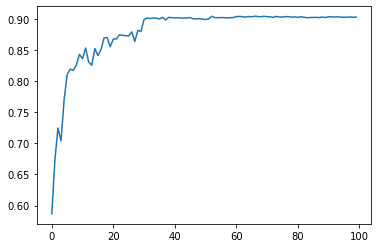

In [12]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels.to("cpu"), predicted_labels.to("cpu"))
print(f"Accuracy: {accuracy}")
plt.plot(accuracies)
plt.show()

In [13]:
torch.save({
    "model": model.state_dict(),
}, "./models/conv-trl-2.2-state-dict.pt")